<center><h1>Statistics for Machine Learning</h1></center>
&nbsp;
<center><h2>Covariance and the Covariance Matrix</h2></center>

### Overview


### Pre-requisites

This notebook builds on the idea of variance, which is covered in *Population Parameters for Normal Distibutions*.

### Contents

Section 1 - Introduction to Covariance

Section 2 - Calculating and Visualising Covariance

Section 3 - The Covariance Matrix

Section 4 - Conclusion

Section 5 - Glossary

Section 6 - References

### Loading the Data

The SOCR dataset from UCLA contains height and weight information for 25,000 18 year olds, who form the population for this notebook [1].

In [15]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [16]:
plt.style.use('seaborn')

df = pd.read_csv('datasets/SOCR-HeightWeight.csv', sep=',')
heights = list(df['Height(Inches)'])
weights = list(df['Weight(Pounds)'])

print(f'Number of rows: {len(df)}')

Number of rows: 25000


<center><h2>Section 1 - Introduction to Covariance</h2></center>

### 1.1 - Motivation for Studying Bivariate Data

As shown in *Population Parameters for Normal Distibutions*, variance gives a measure of the spread of data for a particular variable. For example, if $X$ represents heights that are normally distributed, then the variation in the measurements of these heights can be represented by $Var(X)$ or $\sigma^2$ (these represent the same quantity).

It is often the case that we take two measurements for each item in a population (or sample). In the case of the SOCR data that has been used so far, both the height and weight has been measured for each individual. This type of data this is called **Bivariate Data**. Bivariate data is often measured to test if there is any relation between two variables. In this case: is a person's height related to their weight? These sorts of questions are very useful, because the question can also be asked as: if a person's height is known, can we predict their weight? Asking this question is the first step to building a basic machine learning model for regression.


### 1.2 - What is Covariance?

**Covariance** is a way to measure how much two variables vary **together**. If $X$ represents the measurements of some heights, and $Y$ represents the measurements of some weights, the covariance value is an indication of the relationship between the two. If $X$ and $Y$ are related, then the covariance value will not be zero, because the two variables must vary together. If the covariance value is 0, then the two variables do not vary together, and so are **independent**. Graphs for each kind of covariance are shown below.

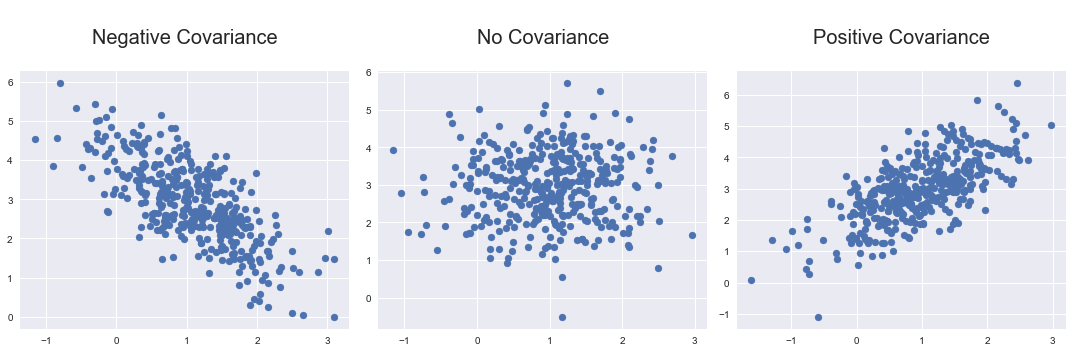

In [18]:
rng = np.random.default_rng()
mean_of_x_and_y = [1.0, 3.0]

# Negative Covariance
covariance_matrix = np.array([[ 0.5, -0.5], [ -0.5,  1.0]])
negative_data = rng.multivariate_normal(mean=mean_of_x_and_y, cov=covariance_matrix, size=400)

# No covariance
covariance_matrix = np.array([[ 0.5, 0], [0,  1.0]])
no_covariance_data = rng.multivariate_normal(mean=mean_of_x_and_y, cov=covariance_matrix, size=400)


# Positive covariance
covariance_matrix = np.array([[ 0.5, 0.5], [ 0.5,  1.0]])
positive_data = rng.multivariate_normal(mean=mean_of_x_and_y, cov=covariance_matrix, size=400)


fig, ax = plt.subplots(ncols=3, figsize=(15,5))

ax[0].set_title('\nNegative Covariance\n', fontsize=20)
ax[0].scatter(negative_data[:,0], negative_data[:,1])

ax[1].set_title('\nNo Covariance\n', fontsize=20)
ax[1].scatter(no_covariance_data[:,0], no_covariance_data[:,1])

ax[2].set_title('\nPositive Covariance\n', fontsize=20)
ax[2].scatter(positive_data[:,0], positive_data[:,1])

fig.tight_layout()

### 1.3 - The 3 Types of Covariance

Unlike variance that can only lie between 0 and $\infin$, covariance can take any value between $-\infin$ and $\infin$. Negative values of covariance mean that there is a negative relationship between two variables: as one increases, the other decreases. An example of this might be supply and demand of different products: if demand for a product increases, then its supply decreases. Positive covariance values mean that there is a positive relationship between two variables: as one increases, the other also increases. This example of heights and weights shows a positive covariance value, since the taller a person is, generally the heavier they are. Because there is a non-zero covariance value, we can (eventually) use this to predict someones weight just by knowing their height.

### 1.4 - Why Covariance is Hard to Interpret

Covariance values are difficult to interpret for two reasons:

&nbsp;

* covariance values do not lie between -1 and 1

* the magnitude of a covariance value alone does not indicate how strong a relationship is

&nbsp;

Covariance can take any value between -$\infin$ and $\infin$, this might make you think that a covariance value of 5000 is much stronger than a lower value, such as 50. This is not necessarily true. The magnitude of the covariance value does not indicate how strong the relationship is between variables. To show this, the graphs below present the same data except the data on the right is scaled up by a factor of 2. The spreads are exactly the same, and the relationship is equally as strong in both graphs - the only difference is the values on the $x$ and $y$ axes. However, the covariance value in the right graph is larger by a factor of 4. This shows the magnitude of the covariance value is sensitive to the scale of the axes.

&nbsp;

**Note:** These two problems with covariance are solved by using the **correlation coefficient** (more in the notebook *Correlation and R Squared*). However, the covariance is needed to calculate the correlation coefficient, so finding the covariance is a very important step.

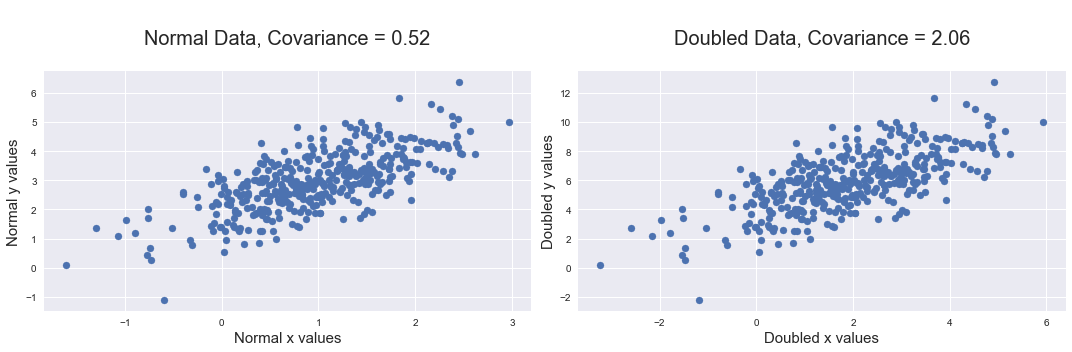

In [19]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

x = positive_data[:,0]
y = positive_data[:,1]

ax[0].set_title(f'\nNormal Data, Covariance = {np.cov(x,y,bias=True)[0][1]:.2f}\n', fontsize=20)
ax[0].scatter(x, y)
ax[0].set_xlabel('Normal x values', fontsize=15)
ax[0].set_ylabel('Normal y values', fontsize=15)

ax[1].set_title(f'\nDoubled Data, Covariance = {np.cov(x*2,y*2,bias=True)[0][1]:.2f}\n', fontsize=20)
ax[1].scatter(x*2, y*2)
ax[1].set_xlabel('Doubled x values', fontsize=15)
ax[1].set_ylabel('Doubled y values', fontsize=15)

fig.tight_layout()

<center><h2>Section 2 - Calculating and Visualising Covariance</h2></center>

### 2.1 - The Covariance Formula

The Covariance formula is very similar to the regular variance formula - and can be calculated for a population or a sample. The difference between them is the same as the difference between the population variance and sample variance: Bessel's correction. Below are the formulae for the population and sample covariances respectively:

$
Cov(X,Y) = \frac{\sum  \limits _{i=1}^{N} (x_i - \mu_x)(y_i - \mu_y)}{N} \tag{Population}
$

&nbsp;

$
Cov(X,Y) = \frac{\sum  \limits _{i=1}^{N} (x_i - \bar{x})(y_i - \bar{y})}{N-1} \tag{Sample}
$

&nbsp;

Aside from the small differences, these formula do the same thing: calculate the average product of the differences in $x$ and $y$ between a point and the mean. That is, the distance between a point and the mean in the $x$ direction, multipled by the distance between a point and the mean in the $y$ direction, averaged over the whole dataset. This gives a measure of the spread of both the $x$ and $y$ values **together** around the mean.

&nbsp;

**Note:** The factor of $N-1$ in the sample covariance exists because the sample covariance underestimates the true covariance, for the same reasons as the sample variance underestimates the population variance. For more, see *Sampling a Distribution & Bessel's Correction*.

### 2.2 - Why the Covariance Equation Works

The covariance equation multiplies two distance together, a distance in $x$ and a distance in $y$. The graphs below show the covariance equation applied to a positive relationship (left) and a negative relationship (right). The mean values of $x$ and $y$ have been added to the graphs using dotted lines.

If both the differences in $x$ and $y$ between a point and the means are positive, or both distances are negative, then the product will be positive. This is the case shown in the graph on the left. A positive covariance value is found when, on average, the points lie in the bottom-left quadrant below the means of $x$ and $y$ and in the top-right quadrant above the means of $x$ and $y$. This is why positive covariance values indicate a positive relationship. Note that the magnitude does not give any information about how strong this correlation is, as shown earlier in the notebook.

If only one of the differences in $x$ and $y$ between a point and the means is negative, then the product will be negative. This is the case shown in the graph on the right. A negative covariance value is found when, on average, the points lie in the top-left quadrant below the mean of $x$ but above the mean of $y$, and in the bottom-right quadrant above the mean of $x$ but below the mean of $y$. This is why negative covariance values indicate a negative relationship. Again, note that the magnitude does not give any information about how strong this correlation is, as shown earlier in the notebook.

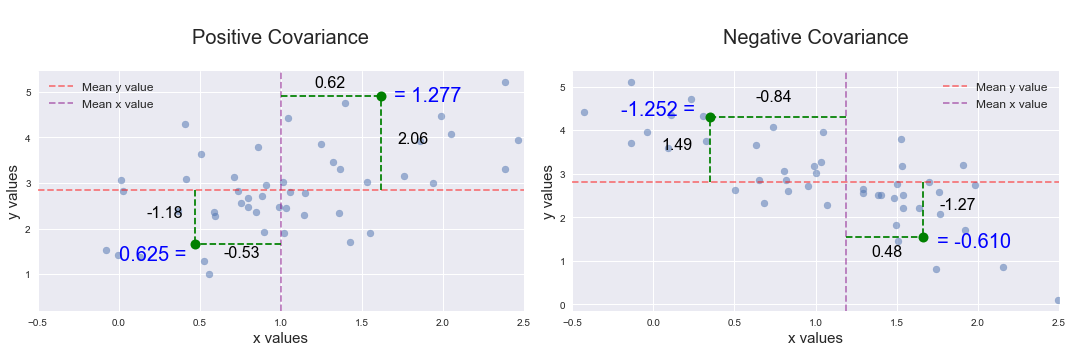

In [69]:
fig, ax = plt.subplots(ncols=2, figsize=(15,5))

x_pos = positive_data[:,0][:50]
y_pos = positive_data[:,1][:50]
x_neg = negative_data[:,0][:50]
y_neg = negative_data[:,1][:50]

for i, values in enumerate([[x_pos, y_pos, 22, 34, '\nPositive Covariance\n'], 
                            [x_neg, y_neg, 1, 49, '\nNegative Covariance\n']]):
    
    x_mean = np.mean(values[0])
    y_mean = np.mean(values[1])
    num1 = values[2] # num1 is the point in the right half plane
    num2 = values[3] # num2 is the point in the left half plane
    x_num1 = values[0][num1] # x coordinate of point num1 in the list (e.g point 39 or 26)
    y_num1 = values[1][num1] # y coordinate of point num1 in the list (e.g point 39 or 26)
    x_num2 = values[0][num2] # x coordinate of point num2 in the list (e.g point 7 or 21)
    y_num2 = values[1][num2] # y coordinate of point num2 in the list (e.g point 7 or 21)

    # Set up the plot
    ax[i].set_title(values[4], fontsize=20)
    ax[i].set_xlim(-0.5,2.5)
    ax[i].set_xlabel('x values', fontsize=15)
    ax[i].set_ylabel('y values', fontsize=15)
    ax[i].scatter(values[0], values[1], alpha=0.5)

    # Mean lines
    ax[i].axhline(y_mean, color='red', linestyle='--', label='Mean y value', alpha=0.5)
    ax[i].axvline(x_mean, color='purple', linestyle='--', label='Mean x value', alpha=0.5)

    # Legend
    ax[i].legend(fontsize=12)

    # Points and distance lines
    ax[i].plot(x_num1, y_num1, marker='o', markersize=10, color='green')
    ax[i].plot(x_num2, y_num2, marker='o', markersize=10, color='green')

    # num1
    dist_1 = x_num1-x_mean
    dist_2 = y_num1-y_mean

    # Horizontal line from the x mean to num1
    ax[i].plot([x_mean, x_num1],[y_num1, y_num1], color='green', linestyle='--')
    if dist_2 < 0:
        ax[i].annotate(text=f'{dist_1:.2f}', xy=[x_mean+(dist_1/3), y_num1+(dist_2/3)],fontsize=16, color='black')
    else:
        ax[i].annotate(text=f'{dist_1:.2f}', xy=[x_mean+(dist_1/3), y_num1+0.2],fontsize=16, color='black')

    # Vertical line from the y mean to num1
    ax[i].plot([x_num1, x_num1],[y_mean, y_num1], color='green', linestyle='--')
    ax[i].annotate(text=f'{dist_2:.2f}', xy=[x_num1+0.1, y_mean+(dist_2/2)],fontsize=16, color='black')
    
    # num2
    dist_3 = x_num2-x_mean
    dist_4 = y_num2-y_mean

    # # Horizontal line from the x mean to num2
    ax[i].plot([x_mean, x_num2],[y_num2, y_num2], color='green', linestyle='--')
    ax[i].annotate(text=f'{dist_3:.2f}', xy=[x_mean+(dist_3/1.5),y_num2+(dist_4/4)],fontsize=16, color='black')

    # # Vertical line from the y mean to num2
    ax[i].plot([x_num2, x_num2],[y_mean, y_num2], color='green', linestyle='--')
    ax[i].annotate(text=f'{dist_4:.2f}', xy=[x_num2-0.3, y_mean+(dist_4/2)],fontsize=16, color='black')

ax[0].annotate(text=f'= {0.62*2.06:.3f}', xy=[1.7, 4.8], color='blue', fontsize=20)
ax[0].annotate(text=f'{-1.18*-0.53:.3f} =', xy=[0, 1.3], color='blue', fontsize=20)
ax[1].annotate(text=f'{-0.84*1.49:.3f} =', xy=[-0.2, 4.35], color='blue', fontsize=20)
ax[1].annotate(text=f'= {-1.27*0.48:.3f}', xy=[1.75, 1.3], color='blue', fontsize=20)

fig.tight_layout()

### 2.3 Visual Summary of Covariance

As shown above, it is useful to plot the lines for the mean of $x$ and $y$, since the covariance finds the distance between each point and these values. It then becomes easy to visualise the distances that are described in the covariance equation. The product of these distances will either be positive or negative. Points in the bottom-left and top-right quadrants (made by the lines of the means for $x$ and $y$) will give a positive product, since either the distances from the mean both are positive or both negative. Similarly, points in the top-left and bottom-right quadrants will give a negative product, since one of the distances is negative. This splits the dataset into points that give positive distances, and points that give negative distances - which is shown on the graph below.

If there are more points in the positive quadrants, the average product of distances is more likely to be positive, and so there will be a positive covariance. If there are more points in the negative quadrants, the average product of distances is more likely to be negative, and so there will be a negative covariance. If there are roughly the same amount of points in the positive quadrants as those in negative quadrants, then the average of the products is likely to be near 0, since the positive and negative values will cancel eachother out. This is the case when variables are independent of eachother, since they do not vary together.

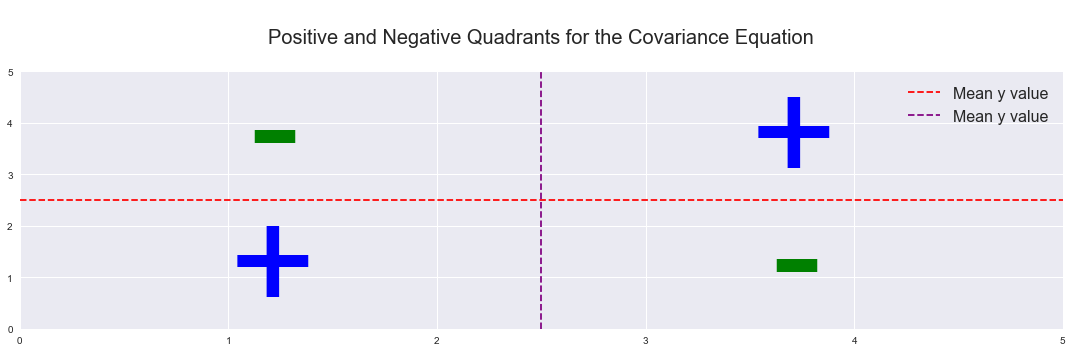

In [22]:
fig, ax = plt.subplots(figsize=(15,5))

x_min, x_max, y_min, y_max = 0, 5, 0, 5
x_mean, y_mean = 2.5, 2.5

ax.set_xlim(x_min,x_max)
ax.set_ylim(y_min,y_max)

ax.set_title('\nPositive and Negative Quadrants for the Covariance Equation\n', fontsize=20)

ax.plot([x_min, x_max], [y_mean, y_mean], color='red', linestyle='--', label='Mean y value')
ax.plot([x_mean, x_mean], [y_min, y_max], color='purple', linestyle='--', label='Mean y value')

ax.annotate(text='+', xy=[3.5, 2.8], fontsize=150, color='blue')
ax.annotate(text='+', xy=[1, 0.3], fontsize=150, color='blue')

ax.annotate(text='-', xy=[3.6, 0.5], fontsize=150, color='green')
ax.annotate(text='-', xy=[1.1, 3.0], fontsize=150, color='green')

ax.legend(fontsize=16)

fig.tight_layout()

### 2.4 - The Covariance of a Variable with Itself

It might seem like a trivial question to ask about the covariance between a variable and itself, but it is actually a very useful property that will be leveraged in the next section. Substituting the same variable twice into the covariance formula gives:

&nbsp;

$
Cov(X,X) = \frac{\sum  \limits _{i=1}^{N} (x_i - \mu_x)(x_i - \mu_x)}{N}
$

&nbsp;

This can be simplified to:

&nbsp;

$
Cov(X,X) = \frac{\sum  \limits _{i=1}^{N} (x_i - \mu_x)^2}{N}
$

&nbsp;

which is the equation for variance.

&nbsp;

Thinking about this geometrically, a graph can be plot with $X$ along both the $x$ and $y$ axes, which will form a perfectly straight line with gradient 1. The only variance in this data is the variance of $x$ itself. See the graph below for this geometric interpretation.

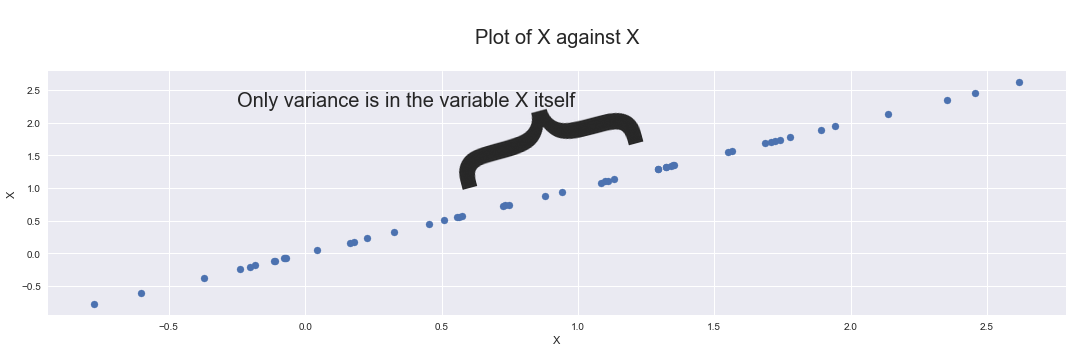

In [7]:
fig, ax = plt.subplots(figsize=(15,5))
ax.set_title('\nPlot of X against X\n', fontsize=20)
ax.set_xlabel('X')
ax.set_ylabel('X')
ax.scatter(x_pos, x_pos)

ax.annotate(text='Only variance is in the variable X itself',xy=(0,0), xytext=(-0.25,2.25), fontsize=20)
ax.annotate(text='{',xy=(0,0), xytext=(0.5,1.5), rotation=-75, fontsize=200)

fig.tight_layout()

### 2.5 Calculating the Covariance and Height and Weight

Now the theory has been covered, the covariance equation will be applied to the SOCR dataset for heights and weights. Given the ideas that have been built up over this notebook so far, we can expect there to be a positive covariance value. This is because the taller a person is, the most they can be expected to weigh, on average. As the cell below shows, the covariance value is positive as expected, and so there is a positive relationship between height and weight.

The covariance formula is implemented in vanilla Python below, and compared to the NumPy `np.cov()` function.

In [8]:
def mean(values):
    return sum(values)/len(values)

def covariance(A, B):
    mu_a = mean(A)
    mu_b = mean(B)
    N = len(A)
    return sum([(a-mu_a)*(b-mu_b) for a,b in zip(A, B)]) / N

vanilla_cov = covariance(heights, weights)
np_cov = np.cov(heights,weights, bias=True)[0][1]

print(f'Vanilla Python: {vanilla_cov}')
print(f'NumPy         : {np_cov}\n')
print(f'Difference    : {vanilla_cov-np_cov}')


Vanilla Python: 11.150583132400454
NumPy         : 11.150583132400374

Difference    : 7.993605777301127e-14


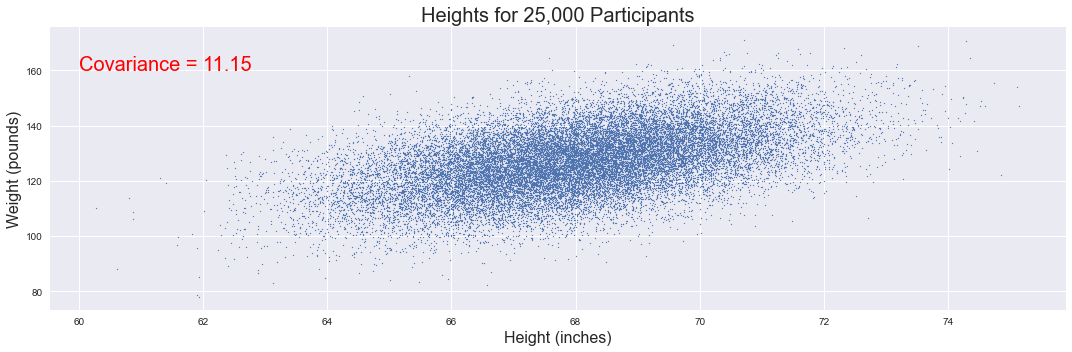

In [9]:
fig, ax = plt.subplots(figsize=(15,5))

ax.set_title('Heights for 25,000 Participants', fontsize=20)
ax.scatter(heights, weights, s=1)
ax.set_xlabel('Height (inches)', fontsize=16)
ax.set_ylabel('Weight (pounds)', fontsize=16)

ax.annotate(text=f'Covariance = {vanilla_cov:.2f}', xy=[60,160], color='red', fontsize=20)

fig.tight_layout()

<center><h2>Section 3 - The Covariance Matrix</h2></center>

<center><h2>Section 4 - Conclusion</h2></center>

<center><h2>Section 5 - Glossary</h2></center>

**Bivariate Data**
> Definition

**Covariance**
> Definition

**Independent**
> Definition

**Key word**
> Definition

<center><h2>Section 6 - References</h2></center>

[1] SOCR Heights and Weights dataset - [UCLA](http://socr.ucla.edu/docs/resources/SOCR_Data/SOCR_Data_Dinov_020108_HeightsWeights.html)

[2] Decription - [Website domain](link)